In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


from sklearn import preprocessing
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


from sklearn.model_selection import StratifiedKFold


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler

2024-08-25 10:47:11.777475: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-25 10:47:12.131702: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-25 10:47:12.481212: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-25 10:47:12.765919: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-25 10:47:12.849361: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-25 10:47:13.429977: I tensorflow/core/platform/cpu_feature_gu

In [26]:
# Load the entire dataset into a pandas dataframe

df = pd.read_parquet('/nobackup/amimalik/bits/dataset/dimensions/4Q/working_dataset.parquet')
model_df = pd.read_csv('/nobackup/amimalik/bits/dataset/dimensions/4Q/sorted_failures.csv')

In [30]:
def get_model_data(df, model):
    model_df = df[df['model'] == model]
    model_df = model_df.drop(columns=['model'])
    model_df.drop(columns=['serial_number'], inplace=True)
    return model_df

In [31]:
df.columns

Index(['Reallocated_Sectors_Count', 'Power-On_Hours',
       'I/O_Error_Detection_and_Correction', 'Reported_Uncorrectable_Errors',
       'Load_Unload_Cycle', 'Current_Pending_Sector_Count',
       'Offline_Uncorrectable', 'Head_Flying_Hours', 'Total_LBAs_Written',
       'Total_LBAs_Read', 'failure', 'model', 'serial_number'],
      dtype='object')

In [32]:
# to be enabled later for all datasets and models
for models in model_df['model']:
    final_df = get_model_data(df, models)
    final_df.fillna(final_df.mean(), inplace=True)
    test = final_df.isnull().sum()
    d_col = []
    for k in test.keys():
        if test[k] == final_df.shape[0]:
            d_col.append(k)
    final_df.drop(columns=d_col, inplace=True)

In [33]:
final_df = get_model_data(df, 'ST12000NM0008')

In [34]:
final_df.shape

(68823, 11)

In [35]:
# import pycaret classification and init setup
from pycaret.classification import *
s = setup(final_df, target = 'failure', session_id = 123, index=False, fix_imbalance = True, remove_outliers = True, normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Target,failure
2,Target type,Binary
3,Original data shape,"(68823, 11)"
4,Transformed data shape,"(111565, 10)"
5,Transformed train set shape,"(90918, 10)"
6,Transformed test set shape,"(20647, 10)"
7,Numeric features,10
8,Rows with missing values,100.0%
9,Preprocess,True


In [36]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.9913,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1900
rf,Random Forest Classifier,0.9807,0.8296,0.0694,0.0508,0.0581,0.0487,0.0495,1.4270
et,Extra Trees Classifier,0.9787,0.8302,0.0789,0.0504,0.0605,0.0505,0.0522,0.5050
dt,Decision Tree Classifier,0.9729,0.5483,0.1100,0.0460,0.0647,0.0533,0.0587,0.1810
knn,K Neighbors Classifier,0.9629,0.5823,0.1412,0.0394,0.0610,0.0482,0.0590,0.5680
lightgbm,Light Gradient Boosting Machine,0.9528,0.7291,0.2082,0.0429,0.0710,0.0575,0.0773,39.1050
nb,Naive Bayes,0.8782,0.7328,0.4470,0.0321,0.0599,0.0445,0.0936,0.0970
svm,SVM - Linear Kernel,0.8607,0.7737,0.5307,0.0331,0.0623,0.0468,0.1058,0.1200
gbc,Gradient Boosting Classifier,0.8420,0.7389,0.4951,0.0272,0.0516,0.0357,0.0865,2.4080
lr,Logistic Regression,0.8344,0.7725,0.5641,0.0294,0.0558,0.0400,0.0998,0.6990


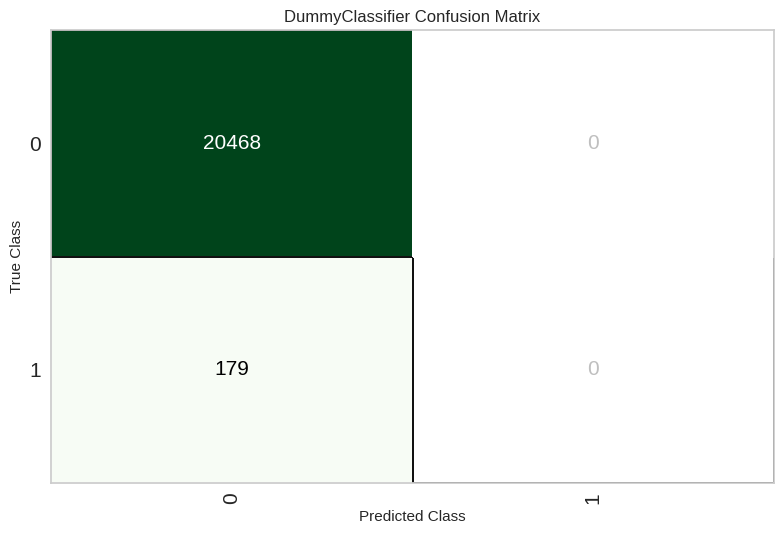

In [37]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

In [ ]:
# plot AUC
plot_model(best, plot = 'auc')

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

In [ ]:
holdout_pred.head()